In [1]:
import json
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os
import numpy as np
import math

results_path = './results/session7/'
files = glob.glob(results_path + '*.json')
results = []

for file in files:
    with open(file) as f:
        filename = os.path.basename(file)
        splitted_filename = filename.split('_')
        graph = splitted_filename[0]
        algorithm = splitted_filename[1]
        timestamp = splitted_filename[3].split('.')[0] if len(splitted_filename) > 3 else ''
        content = json.load(f)
        content['graphId'] = graph
        content['algorithm'] = algorithm
        content['timestamp'] = timestamp
        results.append(content)

results = pd.DataFrame(results, columns=['graphId', 'algorithm', 'initializationTime', 'executionTime', 'totalTime', 'timestamp','V','E'])
results

,graphId,algorithm,initializationTime,executionTime,totalTime,timestamp,V,E
0,graph4b,parallelbcsrvc,0.177088,8.589440,8.766528,20240926153647,1000,13926
1,graph3b,serial,0.037000,1.107000,1.145000,20240926111815,100,918
2,BVZ-tsukuba5,parallelbcsrvc,3.687744,2876.613770,2880.301514,20240926132402,110594,501390
3,graph4b,parallelbcsrtc,0.165472,8.046880,8.212352,20240926165151,1000,13926
4,graph4,serial,1.082000,6095.555000,6096.638000,20240926112108,1000,6963
...,...,...,...,...,...,...,...,...
635,BVZ-tsukuba11,parallelbcsrvc,5.611744,3969.984863,3975.596436,20240926123941,110594,510446
636,graph2,parallelbcsrtc,0.104448,0.879872,0.984320,20240926174139,6,8
637,graph5b,parallel,516.851685,4319.764648,4836.616699,20240926113946,10000,184714
638,graph3b,parallelbcsrtc,0.110752,1.420576,1.531328,20240926195851,100,918


In [2]:
agg_results = results.groupby(['graphId', 'algorithm', 'V', 'E']).agg({'initializationTime': ['mean', 'std', 'min', 'max'], 'executionTime': ['mean', 'std', 'min', 'max'], 'totalTime': ['mean', 'std', 'min', 'max']}).reset_index()
agg_results.columns = ['graphId', 'algorithm', 'V', 'E', 'initTime_mean', 'initTime_std', 'initTime_min', 'initTime_max', 'execTime_mean', 'execTime_std', 'execTime_min', 'execTime_max', 'totTime_mean', 'totTime_std', 'totTime_min', 'totTime_max']
agg_results

,graphId,algorithm,V,E,initTime_mean,initTime_std,initTime_min,initTime_max,execTime_mean,execTime_std,execTime_min,execTime_max,totTime_mean,totTime_std,totTime_min,totTime_max
0,BVZ-tsukuba0,parallelbcsrvc,110594,514483,4.316970,0.807384,3.706112,5.586112,3480.940967,11.856063,3460.486084,3508.109863,3485.257910,11.636270,3466.072021,3511.815918
1,BVZ-tsukuba1,parallelbcsrvc,110594,526213,4.040925,0.755527,3.677856,6.164256,3717.175293,340.068870,3485.981201,4524.394531,3721.216187,340.074571,3489.792480,4528.504395
2,BVZ-tsukuba10,parallelbcsrvc,110594,516529,3.922106,0.571328,3.641312,5.519840,3601.118945,59.583717,3527.722900,3751.367920,3605.041064,59.647778,3531.651367,3755.103516
3,BVZ-tsukuba11,parallelbcsrvc,110594,510446,4.369069,0.867561,3.735872,5.788032,4019.494214,262.395963,3826.765137,4738.638672,4023.863330,262.082721,3832.220703,4742.378906
4,BVZ-tsukuba12,parallelbcsrvc,110594,510816,4.245824,0.869742,3.692320,6.135008,3803.265967,21.678861,3769.892090,3838.580322,3807.511792,22.037233,3773.584229,3844.193848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,graph8,parallelbcsrvc,50000,541232,2.719030,0.637281,2.120832,3.796448,487.261133,17.533194,461.709412,513.243225,489.980164,17.567164,463.832275,517.039673
60,graph8b,parallelbcsrtc,50000,1082464,2.190410,0.523569,1.963872,3.675424,133166.254688,609.306262,132000.031250,133586.875000,133168.448437,609.444464,132002.015625,133590.546875
61,graph8b,parallelbcsrvc,50000,1082464,2.341056,0.451761,2.102432,3.267968,32.896515,3.325316,29.332096,39.147903,35.237571,3.468408,31.487072,42.270111
62,graph9b,parallelbcsrtc,100000,2304964,4.111494,0.901839,3.627424,5.938880,560174.468750,2437.642592,555632.625000,562271.750000,560178.587500,2437.871019,555636.312500,562275.625000


In [3]:
agg_results = agg_results.sort_values(by=['V'])
agg_results

,graphId,algorithm,V,E,initTime_mean,initTime_std,initTime_min,initTime_max,execTime_mean,execTime_std,execTime_min,execTime_max,totTime_mean,totTime_std,totTime_min,totTime_max
19,graph1,serial,4,5,0.004800,0.003360,0.002000,0.011000,0.003900,0.002726,0.002000,0.009000,0.009100,0.006385,0.004000,0.021000
18,graph1,parallelbcsrvc,4,5,0.137187,0.025694,0.103488,0.176416,1.702410,0.398319,1.285664,2.248960,1.839597,0.419103,1.400576,2.411584
17,graph1,parallelbcsrtc,4,5,0.130042,0.016400,0.100288,0.145888,1.396995,0.387846,0.886368,1.915424,1.527037,0.394323,0.986656,2.038368
16,graph1,parallel,4,5,0.140579,0.018221,0.100064,0.161120,0.311354,0.043618,0.200096,0.350112,0.451933,0.061243,0.300160,0.511232
22,graph2,parallelbcsrvc,6,8,0.142410,0.018966,0.110432,0.167936,1.558586,0.307644,1.052832,1.907072,1.700995,0.313640,1.163264,2.019712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,BVZ-tsukuba6,parallelbcsrvc,110594,512938,4.070982,0.729130,3.599040,5.450976,3192.754224,304.380796,2951.626709,3945.755371,3196.825244,304.362117,2955.276611,3949.354492
13,BVZ-tsukuba7,parallelbcsrvc,110594,502599,3.946470,0.474750,3.715136,5.279648,3923.942969,37.166524,3876.357910,3964.488037,3927.889429,37.277800,3880.112061,3968.275146
14,BVZ-tsukuba8,parallelbcsrvc,110594,503938,3.864166,0.506404,3.609600,5.298112,3717.290234,19.812080,3694.782959,3752.321045,3721.154370,19.668108,3698.392578,3756.064697
8,BVZ-tsukuba2,parallelbcsrvc,110594,508272,3.748202,0.051761,3.670112,3.843808,3615.068506,18.986033,3579.722412,3647.684326,3618.816675,19.001005,3583.411133,3651.469482


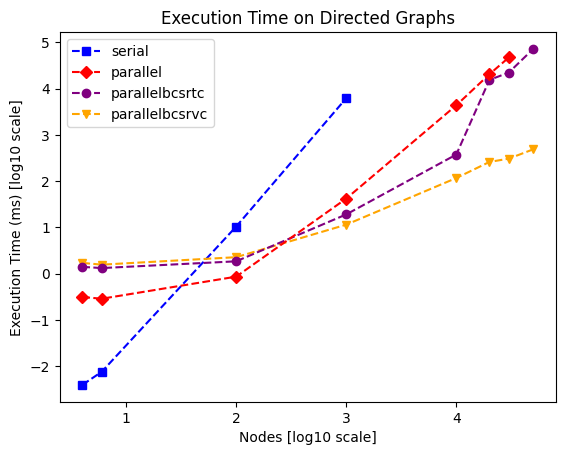

In [4]:
plot_style = {'serial': {'linestyle': 'dashed', 'color': 'blue', 'marker': 's'},
              'parallel': {'linestyle': 'dashed', 'color': 'red', 'marker': 'D'},
              'parallelbcsrtc': {'linestyle': 'dashed', 'color': 'purple', 'marker': 'o'},
              'parallelbcsrvc': {'linestyle': 'dashed', 'color': 'orange', 'marker': 'v'}
              }

legend_order = ['serial', 'parallel', 'parallelbcsrtc', 'parallelbcsrvc']

# Plot execution time for each algorithm on directed graphs (graphId not ends with 'b') and not contains 'tsukuba'
agg_results_directed = agg_results[(~agg_results['graphId'].str.endswith('b')) & (~agg_results['graphId'].str.contains('tsukuba'))]

# Line plot
for algorithm in agg_results_directed['algorithm'].unique():
    data = agg_results_directed[agg_results_directed['algorithm'] == algorithm]
    plt.plot(np.log10(data['V']), np.log10(data['execTime_mean']), label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Nodes [log10 scale]')
plt.ylabel('Execution Time (ms) [log10 scale]')
plt.title('Execution Time on Directed Graphs')
#plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(algo)] for algo in legend_order], legend_order)
#plt.xticks(rotation=45)
plt.show()

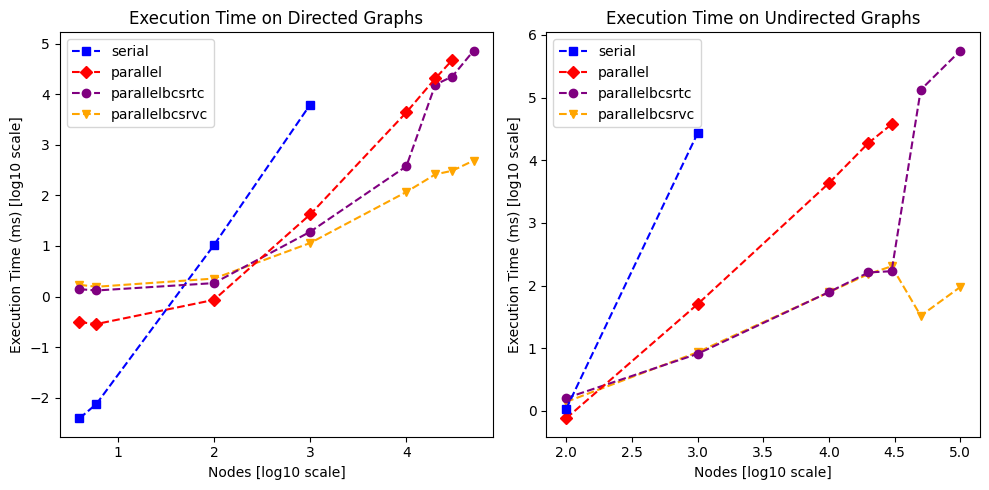

In [5]:
# Plot execution time for each algorithm on directed graphs (graphId not ends with 'b') and plot execution time for each algorithm on undirected graphs (graphId ends with 'b') 
agg_results_directed = agg_results[(~agg_results['graphId'].str.endswith('b')) & (~agg_results['graphId'].str.contains('tsukuba'))]
agg_results_undirected = agg_results[agg_results['graphId'].str.endswith('b')]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for algorithm in agg_results_directed['algorithm'].unique():
    data = agg_results_directed[agg_results_directed['algorithm'] == algorithm]
    plt.plot(np.log10(data['V']), np.log10(data['execTime_mean']), label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Nodes [log10 scale]')
plt.ylabel('Execution Time (ms) [log10 scale]')
plt.title('Execution Time on Directed Graphs')
#plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(algo)] for algo in legend_order], legend_order)
#plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
for algorithm in agg_results_undirected['algorithm'].unique():
    data = agg_results_undirected[agg_results_undirected['algorithm'] == algorithm]
    plt.plot(np.log10(data['V']), np.log10(data['execTime_mean']), label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Nodes [log10 scale]')
plt.ylabel('Execution Time (ms) [log10 scale]')
plt.title('Execution Time on Undirected Graphs')
#plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(algo)] for algo in legend_order], legend_order)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


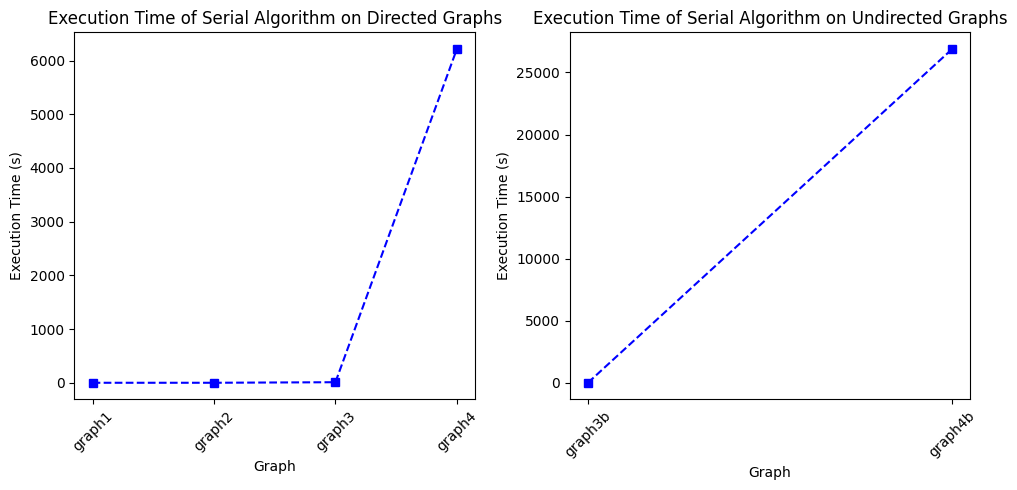

In [6]:
# Plot execution time of serial algorithm for directed and undirected graphs separately
agg_results_directed = agg_results[(agg_results['algorithm'] == 'serial') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'serial') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='serial', linestyle=plot_style['serial']['linestyle'], color=plot_style['serial']['color'], marker=plot_style['serial']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Serial Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='serial', linestyle=plot_style['serial']['linestyle'], color=plot_style['serial']['color'], marker=plot_style['serial']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Serial Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

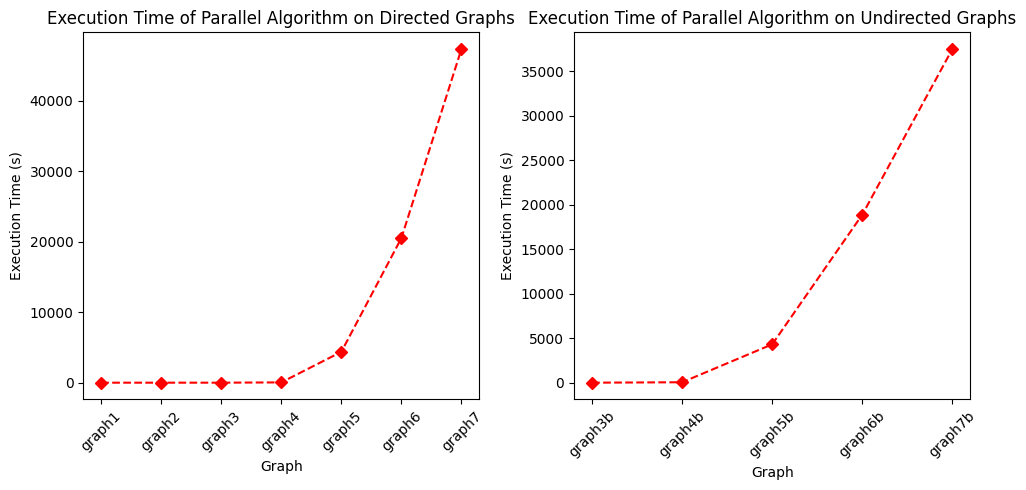

In [7]:
# Plot execution time of parallel algorithm for directed and undirected graphs separately
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallel') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallel') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='parallel', linestyle=plot_style['parallel']['linestyle'], color=plot_style['parallel']['color'], marker=plot_style['parallel']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='parallel', linestyle=plot_style['parallel']['linestyle'], color=plot_style['parallel']['color'], marker=plot_style['parallel']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

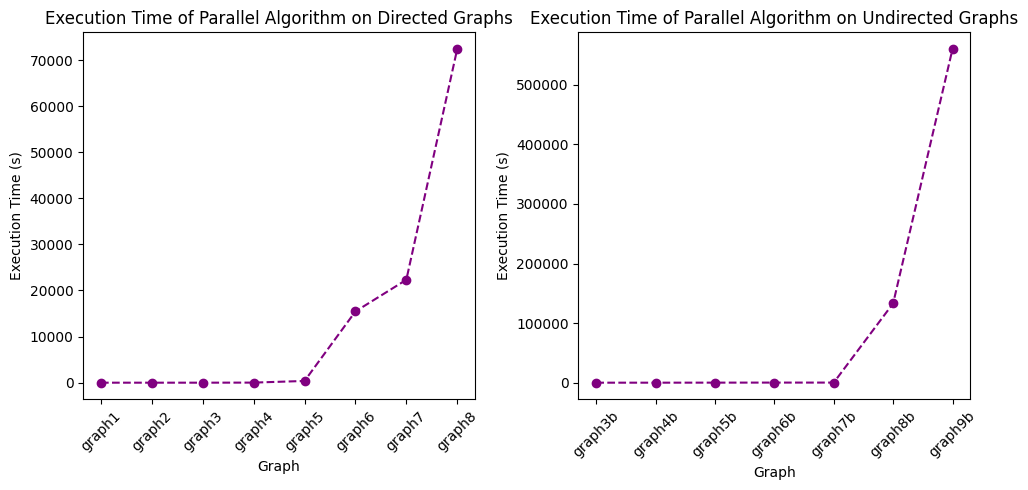

In [8]:
# Plot execution time of parallel algorithm for directed and undirected graphs separately
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallelbcsrtc') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallelbcsrtc') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='parallelbcsrtc', linestyle=plot_style['parallelbcsrtc']['linestyle'], color=plot_style['parallelbcsrtc']['color'], marker=plot_style['parallelbcsrtc']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='parallelbcsrtc', linestyle=plot_style['parallelbcsrtc']['linestyle'], color=plot_style['parallelbcsrtc']['color'], marker=plot_style['parallelbcsrtc']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

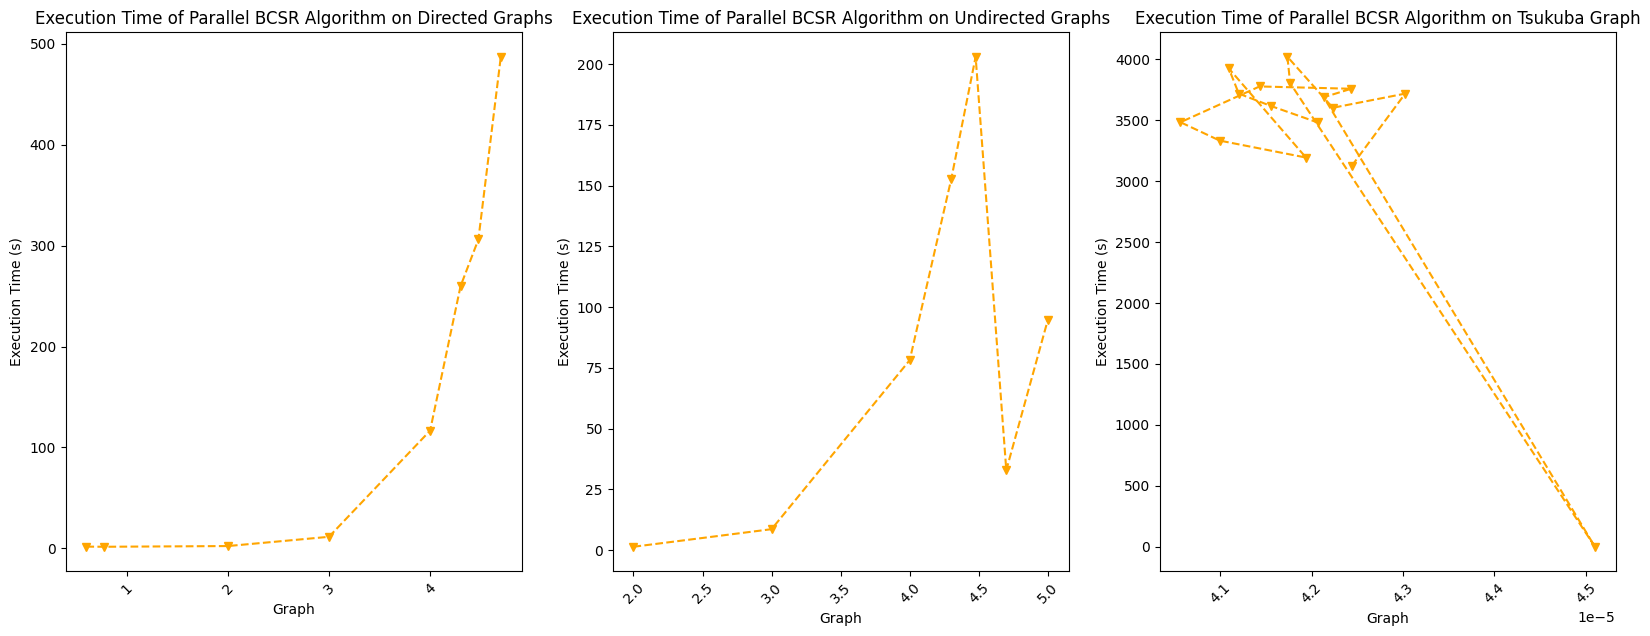

In [9]:
# Plot execution time of parallelbcsrvc algorithm for directed and undirected graphs separately
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallelbcsrvc') & (~agg_results['graphId'].str.endswith('b') & (~agg_results['graphId'].str.contains('tsukuba')))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallelbcsrvc') & (agg_results['graphId'].str.endswith('b') & (~agg_results['graphId'].str.contains('tsukuba')))]
agg_results_directed_tsukuba = agg_results[(agg_results['algorithm'] == 'parallelbcsrvc') & (agg_results['graphId'].str.contains('tsukuba'))]
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
plt.plot(np.log10(agg_results_directed['V']), agg_results_directed['execTime_mean'], label='parallelbcsrvc', linestyle=plot_style['parallelbcsrvc']['linestyle'], color=plot_style['parallelbcsrvc']['color'], marker=plot_style['parallelbcsrvc']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel BCSR Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 3, 2)
plt.plot(np.log10(agg_results_undirected['V']), agg_results_undirected['execTime_mean'], label='parallelbcsrvc', linestyle=plot_style['parallelbcsrvc']['linestyle'], color=plot_style['parallelbcsrvc']['color'], marker=plot_style['parallelbcsrvc']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel BCSR Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 3, 3)
density = agg_results_directed_tsukuba['E'] / (agg_results_directed_tsukuba['V'] * (agg_results_directed_tsukuba['V'] -1))
plt.plot(density, agg_results_directed_tsukuba['execTime_mean'], label='parallelbcsrvc', linestyle=plot_style['parallelbcsrvc']['linestyle'], color=plot_style['parallelbcsrvc']['color'], marker=plot_style['parallelbcsrvc']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel BCSR Algorithm on Tsukuba Graph')
plt.xticks(rotation=45)
plt.show()

In [10]:
results_path = './results/session8_density1K/'
files = glob.glob(results_path + '*.json')
results = []

for file in files:
    with open(file) as f:
        filename = os.path.basename(file)
        splitted_filename = filename.split('_')
        graph = splitted_filename[0]
        algorithm = splitted_filename[1]
        timestamp = splitted_filename[3].split('.')[0] if len(splitted_filename) > 3 else ''
        content = json.load(f)
        content['graphId'] = graph
        content['algorithm'] = algorithm
        content['timestamp'] = timestamp
        results.append(content)

results = pd.DataFrame(results, columns=['graphId', 'algorithm', 'initializationTime', 'executionTime', 'totalTime', 'timestamp', 'V', 'E'])
results

,graphId,algorithm,initializationTime,executionTime,totalTime,timestamp,V,E
0,graphP1,parallelbcsrvc,1.692576,100.934402,102.626976,20240927122423,1000,999000
1,graphP08,parallelbcsrvc,1.634752,122.927650,124.562401,20240927122313,1000,798960
2,graphP07,parallelbcsrvc,1.577152,127.251328,128.828476,20240927122438,1000,699489
3,graphP04,parallel,11.424000,77.762115,89.186111,20240927121051,1000,399515
4,graphP01,parallelbcsrtc,0.852352,44.084671,44.937023,20240927121405,1000,99554
...,...,...,...,...,...,...,...,...
295,graphP1,parallel,6.426112,71.456993,77.883102,20240927121054,1000,999000
296,graphP09,parallelbcsrvc,1.618400,118.015778,119.634178,20240927122418,1000,898956
297,graphP08,parallel,8.919808,76.544609,85.464417,20240927121111,1000,798960
298,graphP01,parallelbcsrtc,0.820896,31.583776,32.404671,20240927121538,1000,99554


In [11]:
agg_results = results.groupby(['graphId', 'algorithm', 'V', 'E']).agg({'initializationTime': ['mean', 'std', 'min', 'max'], 'executionTime': ['mean', 'std', 'min', 'max'], 'totalTime': ['mean', 'std', 'min', 'max']}).reset_index()
agg_results.columns = ['graphId', 'algorithm', 'V', 'E', 'initTime_mean', 'initTime_std', 'initTime_min', 'initTime_max', 'execTime_mean', 'execTime_std', 'execTime_min', 'execTime_max', 'totTime_mean', 'totTime_std', 'totTime_min', 'totTime_max']
agg_results

,graphId,algorithm,V,E,initTime_mean,initTime_std,initTime_min,initTime_max,execTime_mean,execTime_std,execTime_min,execTime_max,totTime_mean,totTime_std,totTime_min,totTime_max
0,graphP01,parallel,1000,99554,7.276179,0.115177,7.163136,7.566784,62.159840,0.142513,61.961151,62.407936,69.436019,0.231777,69.231972,69.909950
1,graphP01,parallelbcsrtc,1000,99554,0.786755,0.085496,0.550912,0.852352,32.933171,3.922802,31.391008,44.084671,33.719926,3.948986,31.941919,44.937023
2,graphP01,parallelbcsrvc,1000,99554,0.728173,0.134070,0.572832,0.897024,22.888320,2.881917,19.714912,27.011776,23.616493,2.913515,20.287745,27.836737
3,graphP02,parallel,1000,199816,8.673619,0.158417,8.441408,8.914912,70.019651,0.119930,69.885887,70.292610,78.693270,0.246703,78.398270,79.087967
4,graphP02,parallelbcsrtc,1000,199816,1.094275,0.103166,0.808960,1.177152,68.536250,8.279002,65.068771,92.065987,69.630524,8.295162,66.245918,93.205116
5,graphP02,parallelbcsrvc,1000,199816,1.069872,0.173406,0.813888,1.304416,48.429462,6.030601,41.949631,57.451935,49.499334,6.044690,42.790497,58.595200
6,graphP03,parallel,1000,300122,10.015613,0.146653,9.856224,10.288704,74.891068,0.080538,74.791229,75.070236,84.906681,0.188150,84.711266,85.210464
7,graphP03,parallelbcsrtc,1000,300122,1.520387,0.195391,1.001632,1.701888,129.840363,0.661127,128.353821,130.522278,131.360748,0.701824,130.055710,132.036285
8,graphP03,parallelbcsrvc,1000,300122,1.483146,0.256517,1.037184,1.897600,81.309533,0.816809,79.742371,82.020576,82.792677,1.038504,80.798943,83.687325
9,graphP04,parallel,1000,399515,11.446025,0.102043,11.302400,11.651808,77.890358,0.131485,77.715294,78.160896,89.336384,0.200790,89.159325,89.812706


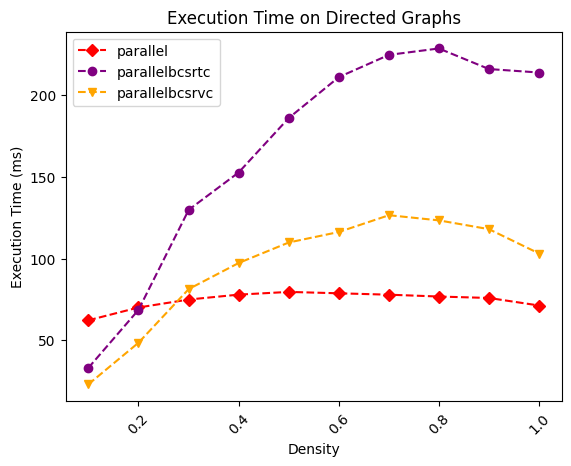

In [13]:
plot_style = {'serial': {'linestyle': 'dashed', 'color': 'blue', 'marker': 's'},
              'parallel': {'linestyle': 'dashed', 'color': 'red', 'marker': 'D'},
              'parallelbcsrtc': {'linestyle': 'dashed', 'color': 'purple', 'marker': 'o'},
              'parallelbcsrvc': {'linestyle': 'dashed', 'color': 'orange', 'marker': 'v'}
              }

legend_order = ['parallel', 'parallelbcsrtc', 'parallelbcsrvc']

# Line plot
for algorithm in agg_results['algorithm'].unique():
    data = agg_results[agg_results['algorithm'] == algorithm]
    density = data['E'] / (data['V'] * (data['V'] -1))
    plt.plot(density, data['execTime_mean'], label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Density')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time on Directed Graphs')
#plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(algo)] for algo in legend_order], legend_order)
plt.xticks(rotation=45)
plt.show()